<a href="https://www.kaggle.com/code/ankitajaiwar/meteorite-landing-eda-with-fun-facts?scriptVersionId=116465615" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import geopandas as gdp
from geopandas import GeoDataFrame
from shapely.geometry import Point
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/meteorite-landings/meteorite-landings.csv


In [2]:
df = pd.read_csv("../input/meteorite-landings/meteorite-landings.csv")
df.head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [3]:
df = df[(df['reclong']<=180) & (df['reclong']>=-180) ]
df = df[(df['reclat']!= 0) | (df['reclong']!= 0)]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32186 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         32186 non-null  object 
 1   id           32186 non-null  int64  
 2   nametype     32186 non-null  object 
 3   recclass     32186 non-null  object 
 4   mass         32068 non-null  float64
 5   fall         32186 non-null  object 
 6   year         32039 non-null  float64
 7   reclat       32186 non-null  float64
 8   reclong      32186 non-null  float64
 9   GeoLocation  32186 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.7+ MB


In [5]:
df.shape

(32186, 10)

In [6]:
df.isnull().sum()

name             0
id               0
nametype         0
recclass         0
mass           118
fall             0
year           147
reclat           0
reclong          0
GeoLocation      0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()


name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [8]:
df.shape

(31930, 10)

In [9]:
df.describe()

,id,mass,year,reclat,reclong
count,31930.000000,3.193000e+04,31930.000000,31930.000000,31930.000000
mean,20780.495302,1.854232e+04,1986.950955,-47.265026,73.185967
std,14925.372728,6.868388e+05,27.822961,46.721667,83.184919
min,1.000000,0.000000e+00,601.000000,-87.366670,-165.433330
25%,9246.250000,6.500000e+00,1982.000000,-79.683330,26.000000
50%,18622.500000,2.960000e+01,1991.000000,-72.000000,56.818810
75%,27243.750000,2.020000e+02,2000.000000,18.334080,159.393540
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


<AxesSubplot:ylabel='Frequency'>

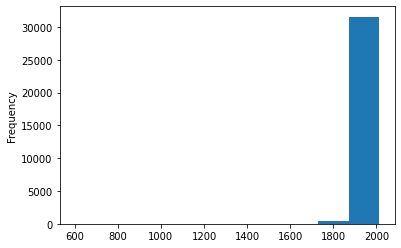

In [10]:
df['year'].plot.hist()

Most of the meteorites were found after 1800. this can mean two things: 1) the data is collected more in these years and increased number of found meteorites.
2) Maximum meteorites did fall in these years.

<AxesSubplot:ylabel='Frequency'>

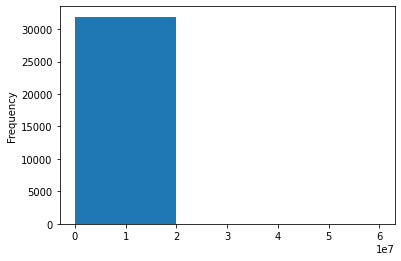

In [11]:
df['mass'].plot.hist(bins = 3)

In [12]:
df = df[df['mass']<100000000]
df = df[(df['year']>1600)&(df['year']<2016)]
df['fall'] = df['fall'].astype('category')
df['fall'] = df['fall'].cat.codes
df['fall'].head()


0    0
1    0
2    0
3    0
4    0
Name: fall, dtype: int8

Observed is encodes as 0 and found is encoded as 1

In [13]:
(df[df['fall'] == 0].shape[0]/df.shape[0])*100

3.317461311947873

Ony ~3 % of the meteorites were observed.


0.2043105068604724

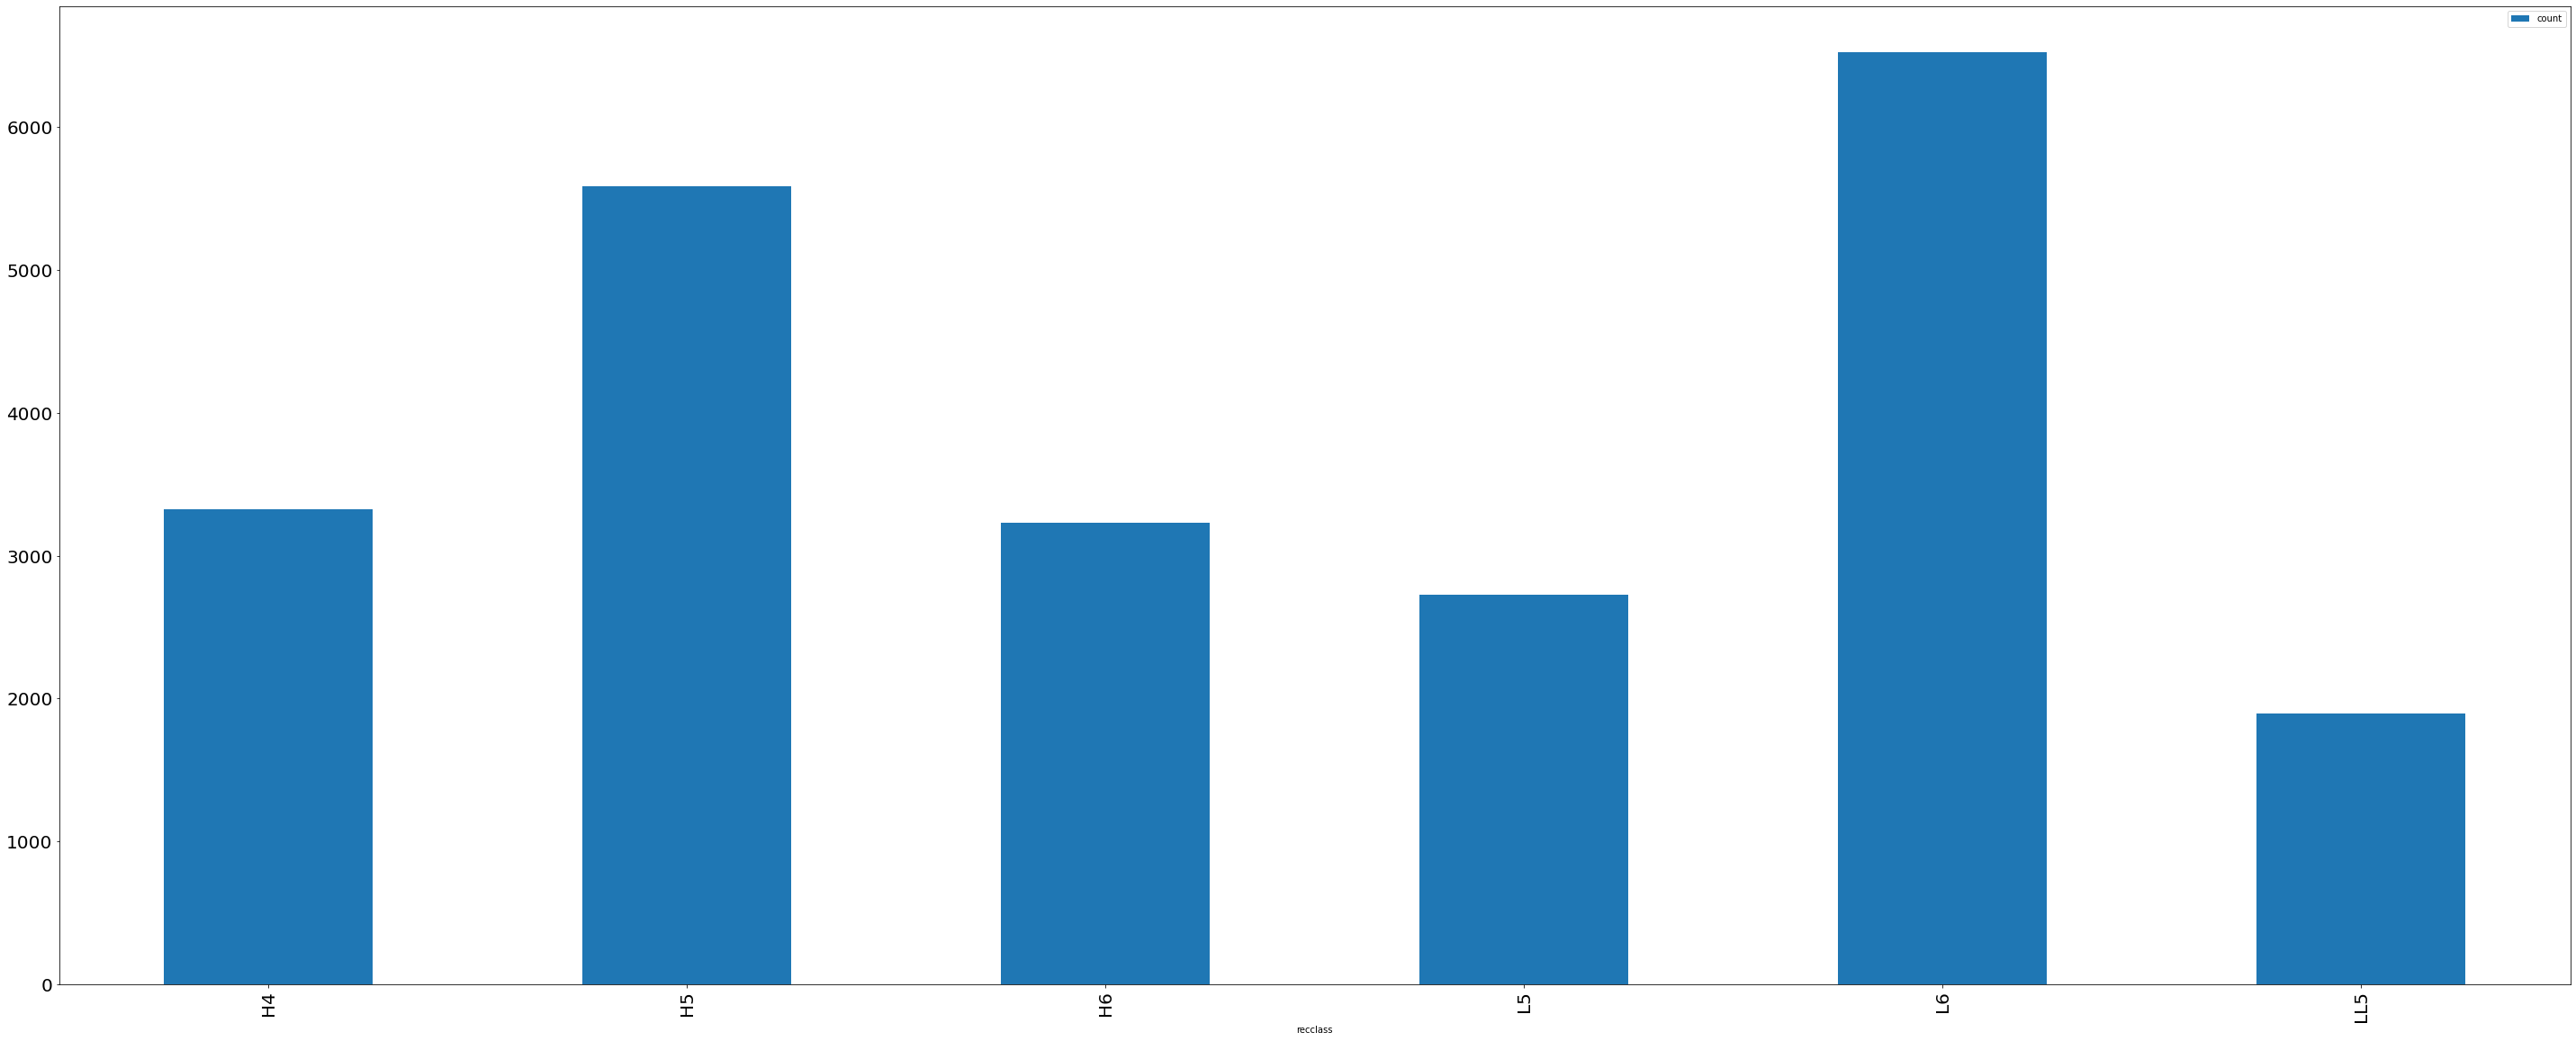

In [14]:
df_class=df.groupby('recclass').agg(['count']).reset_index()
df_class = df_class[df_class[('id', 'count')]>1000]
df_class.plot.bar(x = 'recclass', y = 'id', figsize=(50, 20), fontsize=20)
df[df['recclass'] == 'L6'].shape[0]/df.shape[0]

~20% of meteorites hitting the Earth are L6. According to wikipedia 'The L type ordinary chondrites are the second most common group of meteorites  and L6 is type 6 of L chrondites. A chondrite /ˈkɒndraɪt/ is a stony (non-metallic) meteorite that has not been modified, by either melting or differentiation of the parent body.'

'The H type ordinary chondrites are the most common type of meteorite'

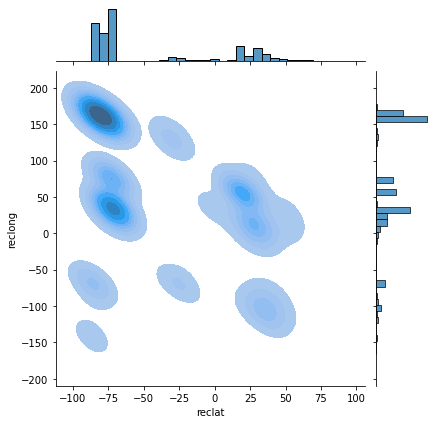

In [15]:
g = sb.JointGrid(data=df, x="reclat", y="reclong")
g.plot(sb.kdeplot, sb.histplot, fill = True)

As appears from the joint graph above. Most meteorites fall in the east below the equator. Let's look at the percentage.

<AxesSubplot:ylabel='None'>

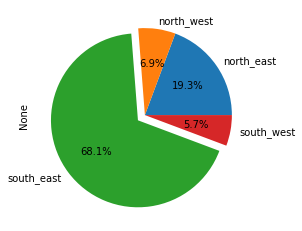

In [16]:
north_east  = df[(df['reclat'] >0) & (df['reclong'] >0)].shape[0]
north_west = df[(df['reclat'] >0) &(df['reclong'] <0)].shape[0]
south_east  = df[(df['reclat'] <0) &(df['reclong'] >0)].shape[0]
south_west  = df[(df['reclat'] <0) &(df['reclong'] <0)].shape[0]
pd.Series([north_east,north_west,south_east,south_west], index = ['north_east','north_west','south_east','south_west']).plot.pie(explode=(0, 0, 0.10,  0), autopct='%1.1f%%')

~68% of the meteorites fall in the south east. 

But let's see where the heaviest meteorites fall.

In [17]:
 df['umbrella'] = df['recclass'].str.split(',', expand = True)[0]

In [18]:
df.sort_values(by = 'mass', ascending = False)[:100]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,umbrella
16383,Hoba,11890,Valid,"Iron, IVB",60000000.0,1,1920.0,-19.58333,17.91667,"(-19.583330, 17.916670)",Iron
5336,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,1,1818.0,76.13333,-64.93333,"(76.133330, -64.933330)",Iron
5333,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,1,1891.0,35.05000,-111.03333,"(35.050000, -111.033330)",Iron
3433,Armanty,2335,Valid,"Iron, IIIE",28000000.0,1,1898.0,47.00000,88.00000,"(47.000000, 88.000000)",Iron
12600,Gibeon,10912,Valid,"Iron, IVA",26000000.0,1,1836.0,-25.50000,18.00000,"(-25.500000, 18.000000)",Iron
...,...,...,...,...,...,...,...,...,...,...,...
2428,Allan Hills A76009,1316,Valid,L6,407000.0,1,1976.0,-76.71667,159.66667,"(-76.716670, 159.666670)",L6
31973,Pei Xian,18784,Valid,Iron,400000.0,1,1917.0,34.70000,117.00000,"(34.700000, 117.000000)",Iron
4971,Augustinovka,4898,Valid,"Iron, IIIAB",400000.0,1,1890.0,48.06667,35.08333,"(48.066670, 35.083330)",Iron
26200,Mount Joy,16779,Valid,"Iron, IIAB",384000.0,1,1887.0,39.78333,-77.21667,"(39.783330, -77.216670)",Iron


First of it appears that the heaviest meteorites are from Iron class. Lets see from the top 100 heaviest meteorites heo many are in the Iron class.

In [19]:
df.sort_values(by = 'mass', ascending = False)[:100][df['umbrella']=='Iron'].shape[0]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


73

73% from the top heavist meteorites are in the Iron class

In [20]:
(df[df['umbrella']=='Iron'].shape[0]/df.shape[0])*100

2.8976881147797755

while Iron clss meteorites make only ~3% of the total meteorite fell or found on Earth. According to wikipedia: 'Iron meteorites, also known as siderites, or ferrous meteorites, are a type of meteorite that consist overwhelmingly of an iron–nickel alloy known as meteoric iron that usually consists of two mineral phases: kamacite and taenite. Most iron meteorites originate from cores of planetesimals, with the exception of the IIE iron meteorite group.

The iron found in iron meteorites was one of the earliest sources of usable iron available to humans, due to the malleability and ductility of the meteoric iron, before the development of smelting that signaled the beginning of the Iron Age' 

But.... where do they fall?

Fun fact: "Meteorites are rarer than gold, platinum, diamonds or emeralds and 1 pound could be worth $1 million"

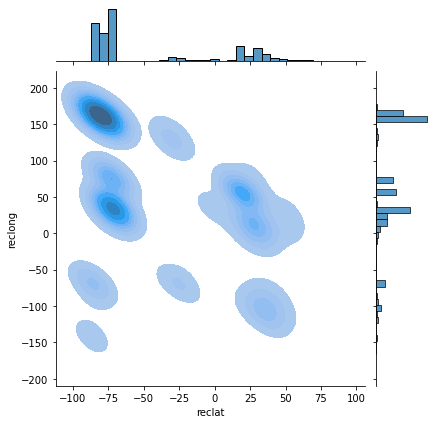

In [21]:
g = sb.JointGrid(data=df, x="reclat", y="reclong")
g.plot(sb.kdeplot, sb.histplot, fill = True)

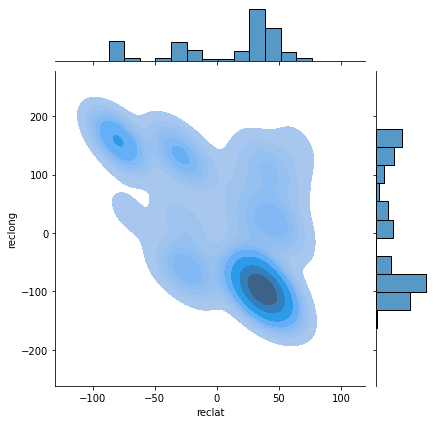

In [22]:
df_iron = df[df['umbrella']=='Iron']
g = sb.JointGrid(data=df_iron, x="reclat", y="reclong")
g.plot(sb.kdeplot, sb.histplot, fill = True)

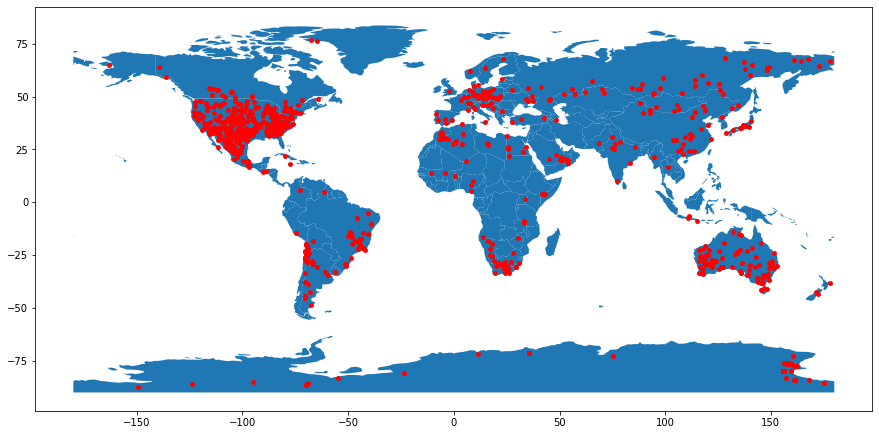

In [23]:

geometry = [Point(xy) for xy in zip(df_iron['reclong'], df_iron['reclat'])]
geo_iron =GeoDataFrame(df_iron, geometry = geometry )
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
geo_iron.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

It appears that most of the iron meteorites fall in the USA.

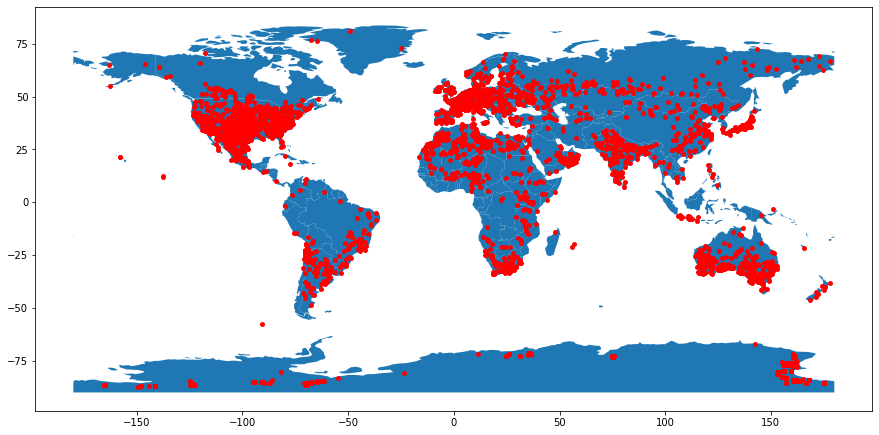

In [24]:
geometry = [Point(xy) for xy in zip(df['reclong'], df['reclat'])]
geo_iron =GeoDataFrame(df, geometry = geometry )
world = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
geo_iron.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

AS from the above map, most meteorites are found on land and very few under water. What happens to the meteorites hitting the water? Do meteorites degrade under water? What are the measues the space companies from around the world take to hunt or them?

An interesting read:

https://mashable.com/article/nasa-meteorite-pacific-ocean-exploration

Let's see what was the impact of heaviest meteorite fell/found on Earth.

In [25]:
df[df['mass']==df['mass'].max()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,umbrella,geometry
16383,Hoba,11890,Valid,"Iron, IVB",60000000.0,1,1920.0,-19.58333,17.91667,"(-19.583330, 17.916670)",Iron,POINT (17.91667 -19.58333)


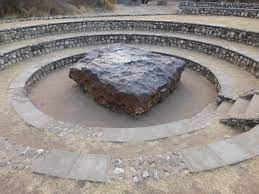

Souce Wikipdia: 'The Hoba meteorite impact is thought to have occurred less than 80,000 years ago. It is inferred[4] that the Earth's atmosphere slowed the object in such a way that it impacted the surface at terminal velocity, thereby remaining intact and causing little excavation (expulsion of earth). Assuming a drag coefficient of about 1.3, the meteor appears to have slowed to about 320 m/s (720 mph) from an entry speed to the atmosphere typically in excess of 10 km/s (22,370 mph). The meteorite is unusual in that it is flat on both major surfaces. The Hoba meteorite left no preserved crater and its discovery was a chance event. In 1920,[1] the owner of the land, Jacobus Hermanus Brits, encountered the object while ploughing one of his fields with an ox. During this work, he heard a loud metallic scratching sound and the plough came to an abrupt halt. The obstruction was excavated, identified as a meteorite and described by Mr. Brits, whose report was published in 1920 and can be viewed at the Grootfontein Museum in Namibia.'

The heaviest meteorite was found and not observed in its falling year. Lets see the impact of the heaviest metal which was observed.

In [26]:

df_observed = df[df['fall']==0]
df_observed[df_observed['mass']==df_observed['mass'].max()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,umbrella,geometry
916,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,0,1947.0,46.16,134.65333,"(46.160000, 134.653330)",Iron,POINT (134.65333 46.16000)


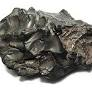
Sourc Wikipedia: 'At around 10:30 on 12 February 1947, eyewitnesses in the Sikhote-Alin Mountains, Primorye, Soviet Union, observed a large bolide brighter than the sun that came out of the north and descended at an angle of about 41 degrees. The bright flash and the deafening sound of the fall were observed for 300 kilometres (190 mi) around the point of impact not far from Luchegorsk and approximately 440 km (270 mi) northeast of Vladivostok. A smoke trail, estimated at 32 km (20 mi) long, remained in the sky for several hours.

As the meteor, traveling at a speed of about 14 km/s (8.7 mi/s), entered the atmosphere, it began to break apart, and the fragments fell together, some burying themselves 6 metres (20 ft) deep.  At an altitude of about 5.6 km (3.5 mi), the largest mass apparently broke up in a violent explosion called an air burst.

On November 20, 1957 the Soviet Union issued a stamp for the 10th anniversary of the Sikhote-Alin meteorite shower. It reproduces a painting by P. I. Medvedev, a Soviet artist who witnessed the fall: he was sitting in his window starting a sketch when the fireball appeared, so he immediately began drawing what he saw.'

In [27]:
df_observed_after_2000 = df_observed[(df_observed['year'] > 2000)]
df_observed_after_2000[df_observed_after_2000['mass']==df_observed_after_2000['mass'].max()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,umbrella,geometry
961,Sulagiri,48951,Valid,LL6,110000.0,0,2008.0,12.66667,78.03333,"(12.666670, 78.033330)",LL6,POINT (78.03333 12.66667)


![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Sulagiri_meteorite%2C_slice.jpg/220px-Sulagiri_meteorite%2C_slice.jpg)

The fall: On Sept. 12, 2008, around 8:30 hrs. Local time, the 
Sulagiri meteorite fell in the Krishnagiri district of Tamil Nadu, 
India. The meteorite was fragmented at least once on the transit 
and led to multiple fall around a cluster of villages near Sulagiri, 
defining an elliptical shaped strewn field of 3 km along NW-SE 
direction and 1 km across. The size of the collected fragments in-
creases from W to E. Seven pieces of the meteorite were col-
lected, totalling ~110 kg, making Sulagiri, the largest meteorite 
fall so far in India. The largest fragment weighed 50 kg and made 
a crater of ~1.5 m on impact, on the main road.

https://www.researchgate.net/publication/253152572_Sulagiri_the_Largest_Meteorite_Fall_in_India

<AxesSubplot:xlabel='year'>

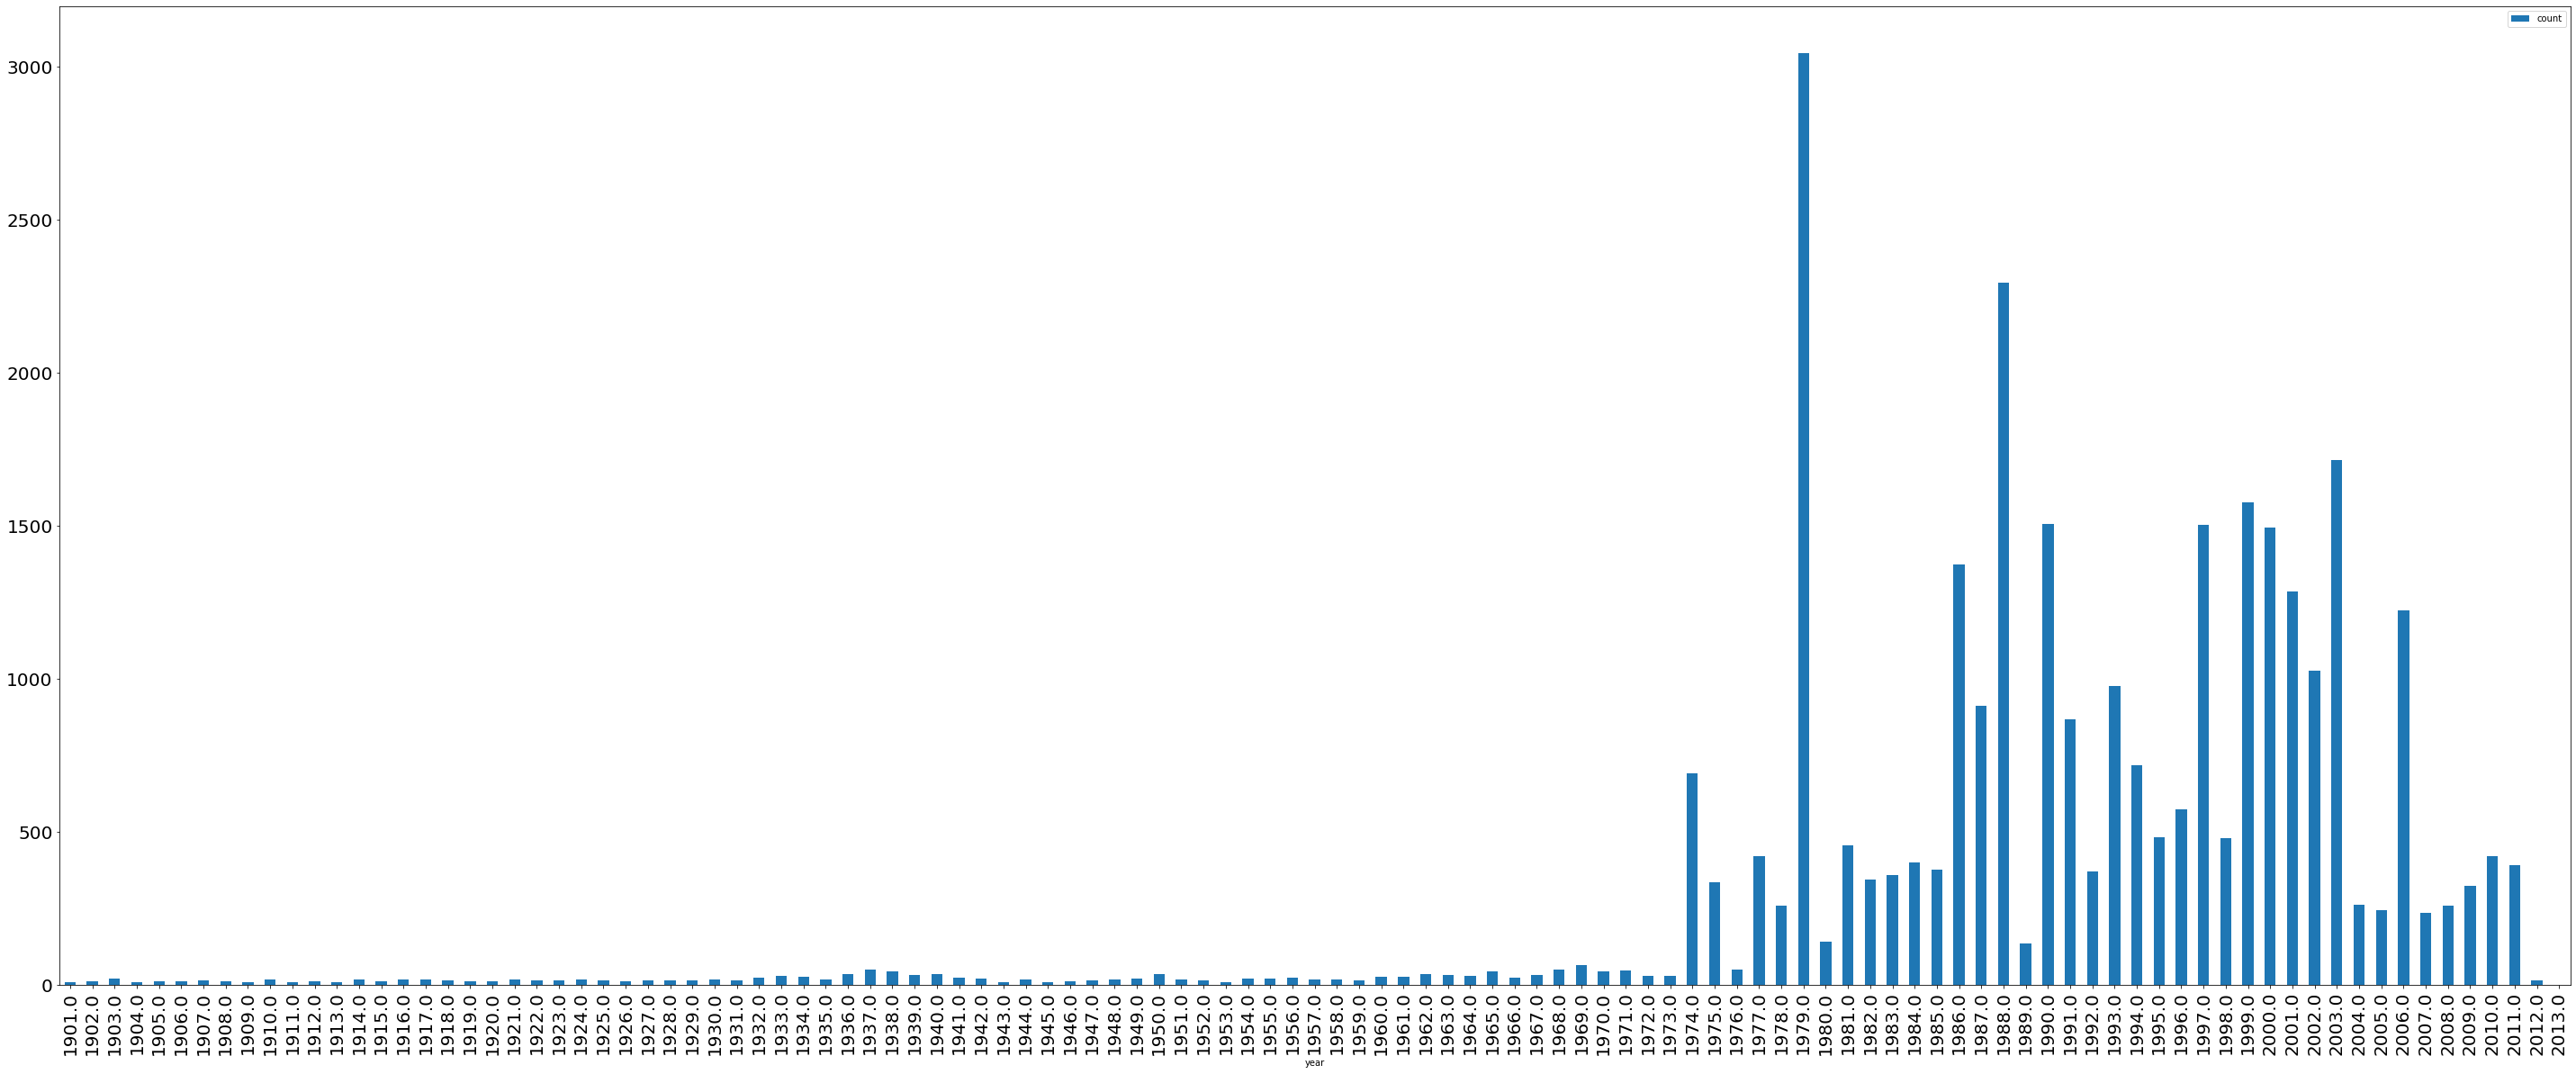

In [28]:
df_year=df[df['year']>1900].groupby('year').agg(['count']).reset_index()
df_year.plot.bar(x = 'year', y = 'recclass', figsize=(50, 20), fontsize=20)

Most meteorites were fell/found in the year 1979.

<AxesSubplot:xlabel='GeoLocation'>

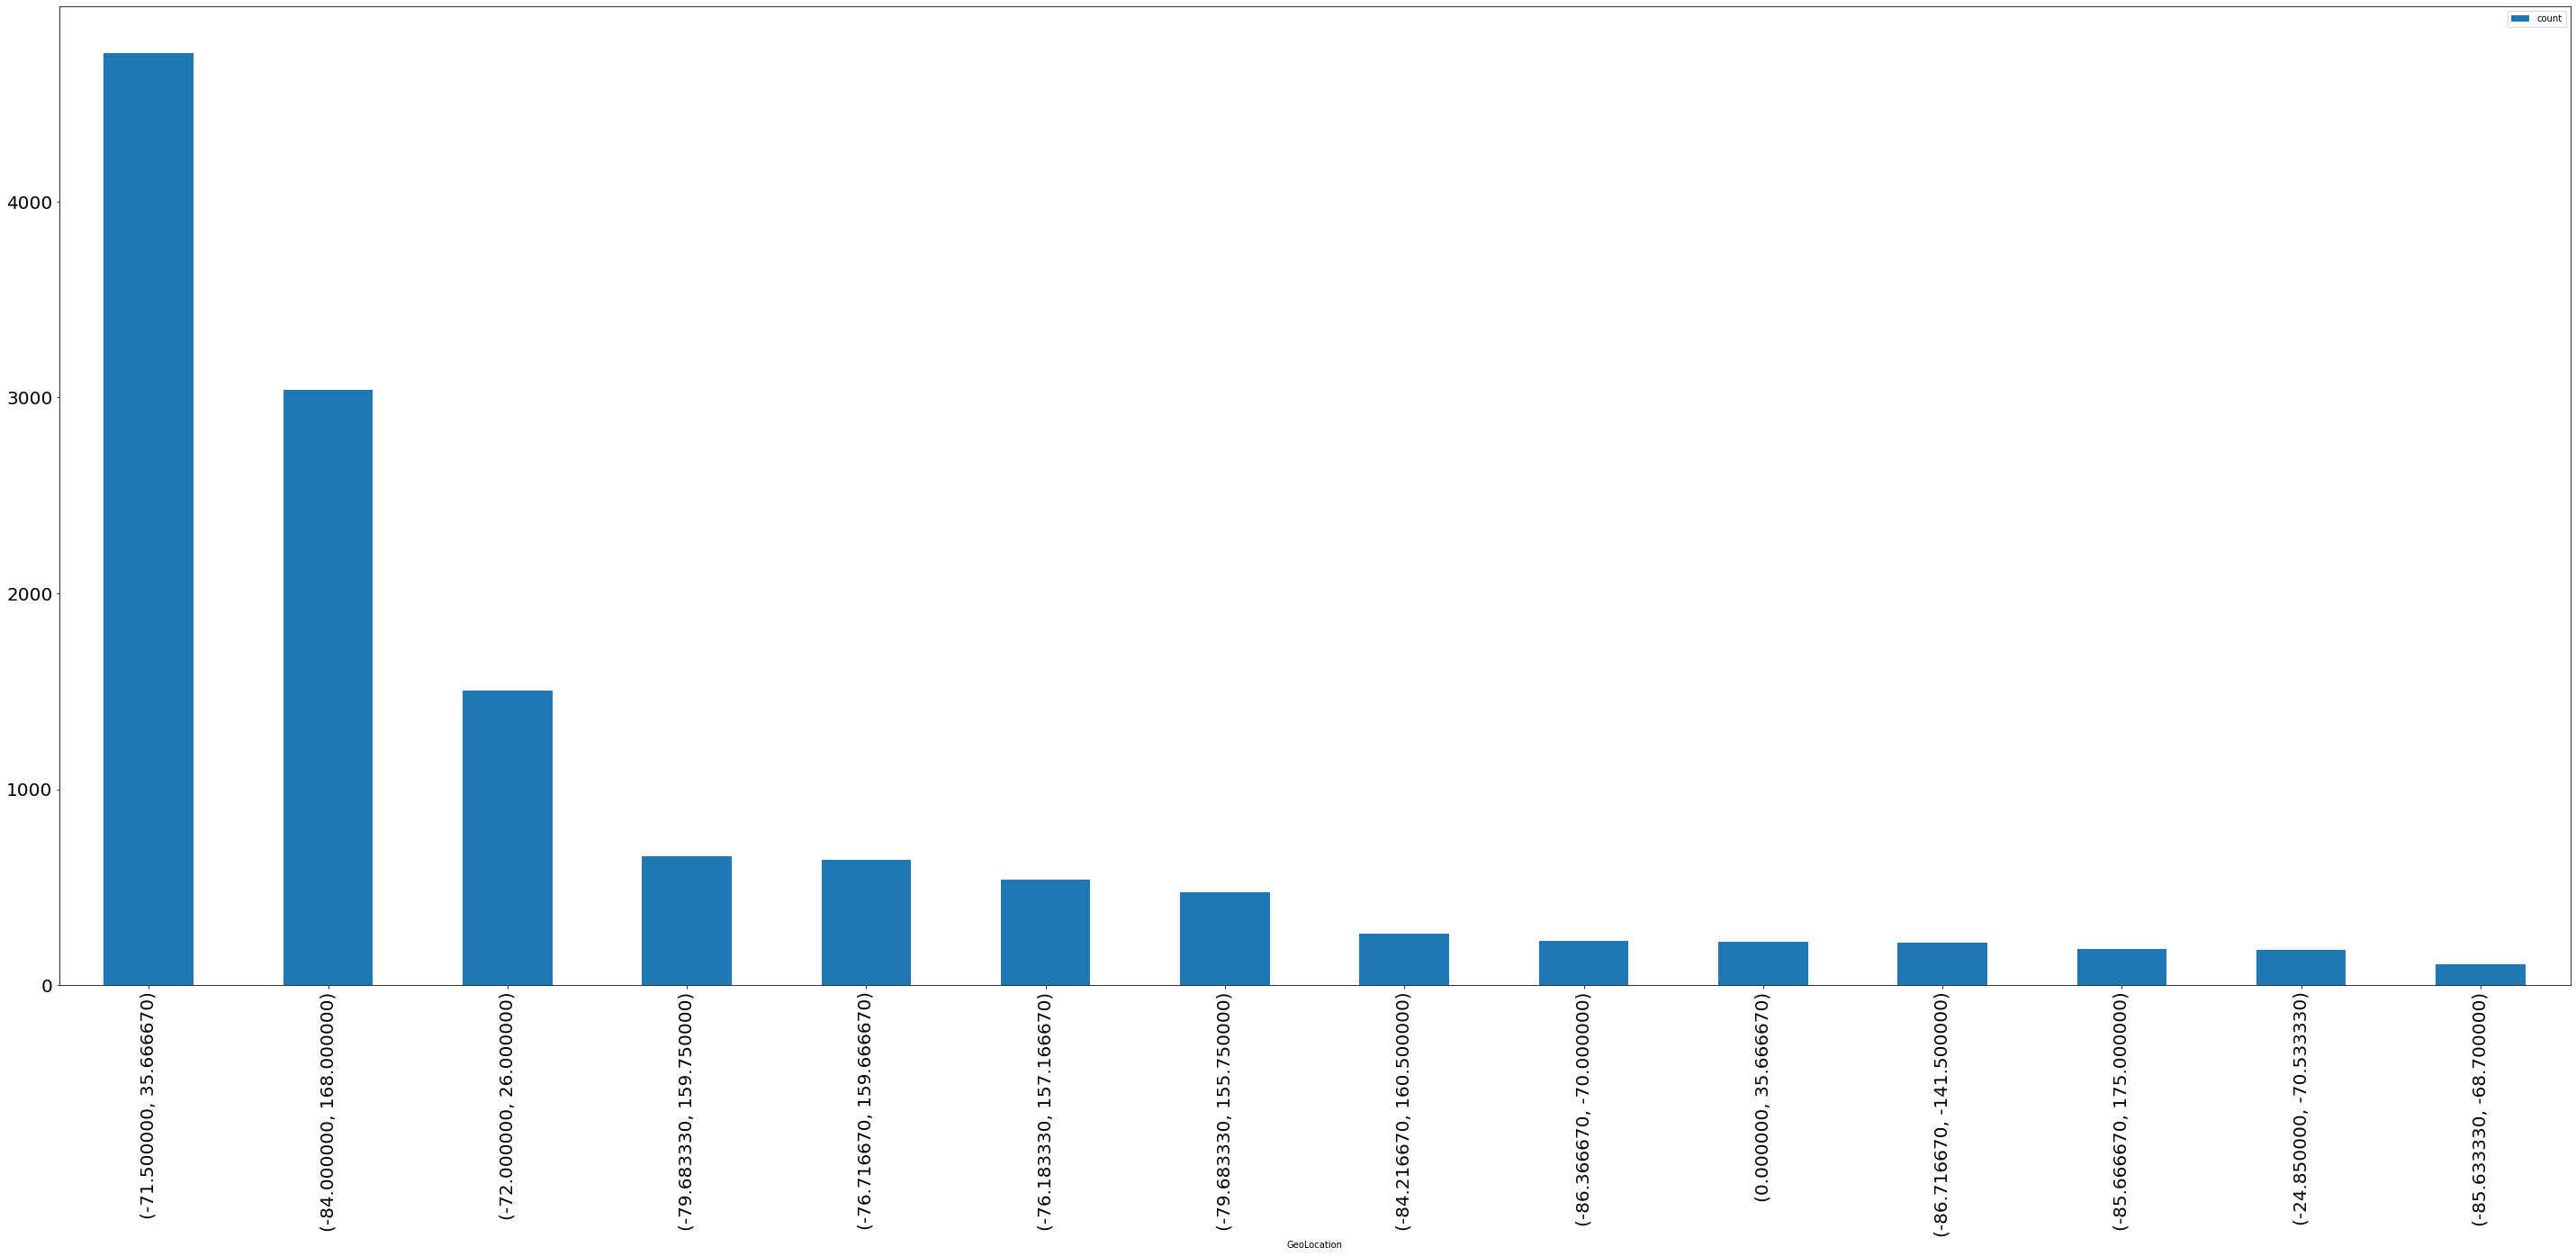

In [29]:
df_loc=df.groupby('GeoLocation').agg(['count']).reset_index()
df_loc = df_loc[df_loc[('id', 'count')]>100]
df_loc = df_loc.sort_values(by = ('id', 'count'), ascending = False)
df_loc.plot.bar(x = 'GeoLocation', y = 'recclass', figsize=(50, 20), fontsize=20)

![](http://www.nasa.gov/sites/default/files/thumbnails/image/img_rocks_on_ice.jpg)

The Geolocation (-71.500000, 35.666670) corresonds to Antarctic Ice Shield, Antarctica. a very interesting read: https://www.space.com/antarctica-undiscovered-meteorites-artificial-intelligence-program
An excerpt from the given link: 

'Nearly two-thirds of all meteorites recovered on Earth originate in Antarctica. The cold, dry nature of the frozen continent helps preserve these extraterrestrial rocks, and the dark colors of these stones make them stand out against ice and snow. Meteorites were originally part of planetary bodies, and so these space rocks from the bottom of the world have yielded many valuable clues about the nature, origins and evolution of the rest of the solar system.'

In [30]:
df['nametype'] = df['nametype'].astype('category')
df['nametype'] = df['nametype'].cat.codes


<AxesSubplot:ylabel='None'>

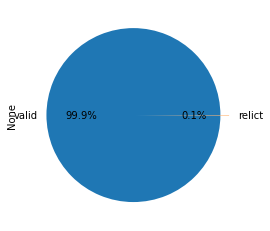

In [31]:
valid_relict = [df[df['nametype']==1].shape[0], df[df['nametype']==0].shape[0]]
pd.Series(valid_relict, index = ['valid','relict']).plot.pie(explode=(0, 0.10), autopct='%1.1f%%')

~0.1 of discovered meteorites are relict(highly degraded by earth's atmmosphere)

In [32]:
df.corr()

,id,nametype,mass,fall,year,reclat,reclong
id,1.000000,-0.052157,-0.013476,0.053116,0.249716,0.058311,-0.184102
nametype,-0.052157,1.000000,0.000684,-0.004753,-0.017412,-0.045444,0.010120
mass,-0.013476,0.000684,1.000000,-0.009156,-0.095842,0.037603,-0.024516
fall,0.053116,-0.004753,-0.009156,1.000000,0.519973,-0.306825,0.117911
year,0.249716,-0.017412,-0.095842,0.519973,1.000000,-0.237765,0.208141
reclat,0.058311,-0.045444,0.037603,-0.306825,-0.237765,1.000000,-0.535187
reclong,-0.184102,0.010120,-0.024516,0.117911,0.208141,-0.535187,1.000000
